# Blood Donation Prediction 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
path = (r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\blood-train.csv")
path1 = (r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\blood-test.csv")

blood = path + "blood-train.csv"
blood1 = path1 + "blood-test.csv"

In [8]:
train = pd.read_csv(path)
test = pd.read_csv(path1)

In [9]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [10]:
test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [11]:
print('Shape of the Trainset:', train.shape)
print('Shape of the Testset:', test.shape)

Shape of the Trainset: (576, 6)
Shape of the Testset: (200, 5)


In [12]:
train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [13]:
Y = train.iloc[:, -1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [14]:
train.tail(5)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [15]:
old_train = train
train=train.iloc[:, 1:5]
test = test.iloc[:, 1:5]

In [16]:
train

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
571,23,1,250,23
572,16,3,750,86
573,21,2,500,52
574,39,1,250,39


In [17]:
test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34


In [20]:
df = pd.merge(train,test)
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [21]:
X = df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [22]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot:ylabel='Months since Last Donation'>

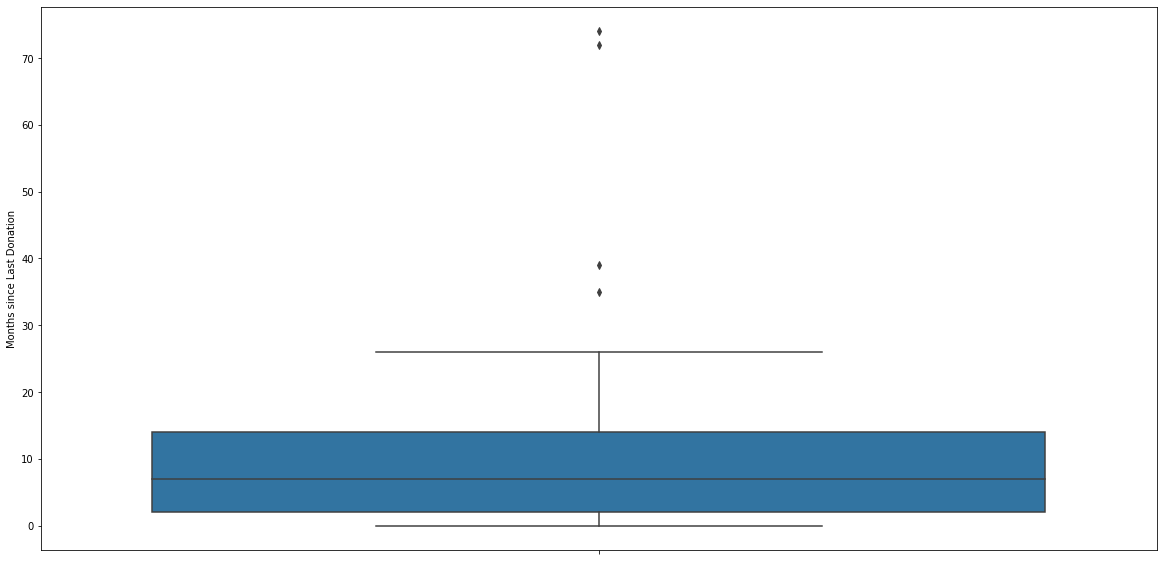

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(y="Months since Last Donation", data=old_train)

<AxesSubplot:>

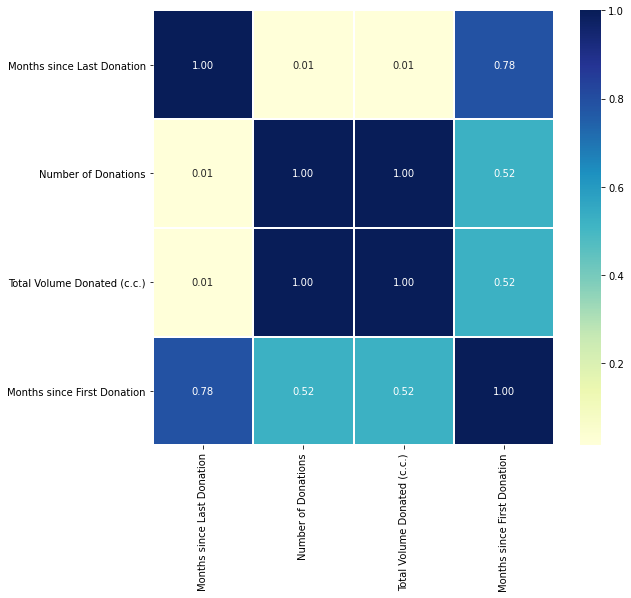

In [25]:
corrmat = X.corr()
f, ax= plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, ax=ax, cmap= "YlGnBu", linewidths= 0.1, fmt= ".2f", annot= True)

In [26]:
train['Months since Last Donation'].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

In [27]:
X['Donating for'] = (X['Months since First Donation'] - X['Months since Last Donation'])
X['Donating for']

0       2
1       2
2       2
3       2
4       2
       ..
805     0
806     0
807     5
808    21
809    17
Name: Donating for, Length: 810, dtype: int64

In [28]:
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


<AxesSubplot:>

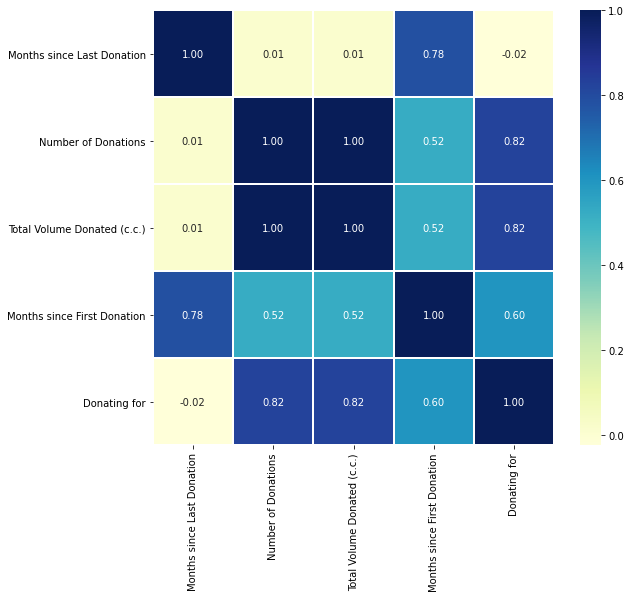

In [29]:
corrmat= X.corr()
f, ax= plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, annot=True, cmap= 'YlGnBu', ax=ax, linewidth= 0.1, fmt= ".2f")

In [33]:
X.drop(['Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [34]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [35]:
X.shape

(810, 4)

In [37]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()


X = scale.fit_transform(X)

In [38]:
train=X[:576]

In [39]:
train.shape

(576, 4)

In [40]:
test= X[576:]

In [41]:
Y= Y[:576]

In [42]:
Y.shape

(576,)

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(train, Y, test_size= 0.2, random_state= 0)

In [45]:
logreg = LogisticRegression(random_state= 7)
logreg.fit(xtrain, ytrain)

LogisticRegression(random_state=7)

In [46]:
pred = logreg.predict(xtest)

In [47]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
accuracy_score(pred, ytest)

0.7155172413793104

In [49]:
roc_auc_score(pred, ytest)

0.7321428571428571

In [50]:
#*Support Vector Machine
SVMC = SVC(probability=True)

SVMC.fit(train, Y)

SVC(probability=True)

In [51]:
pred = SVMC.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
accuracy_score(pred,ytest)

0.7844827586206896

In [53]:
confusion_matrix(pred, ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [54]:
roc_auc_score(pred, ytest)

0.8429487179487177

In [56]:
#*RandomForest

In [57]:
RFC = RandomForestClassifier()
RFC.fit(xtrain, ytrain)

RandomForestClassifier()

In [58]:
pred = RFC.predict(xtest)

In [59]:
confusion_matrix(pred, ytest)

array([[79, 25],
       [ 2, 10]], dtype=int64)

In [60]:
accuracy_score(pred, ytest)

0.7672413793103449

In [61]:
roc_auc_score(pred, ytest)

0.796474358974359

In [62]:
#Decision Tree

model = DecisionTreeClassifier(max_leaf_nodes=4, max_features=3, max_depth= 15)

In [63]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [64]:
pred= model.predict(xtest)

In [65]:
accuracy_score(pred, ytest)

0.7327586206896551

In [67]:
confusion_matrix(pred, ytest)

array([[80, 30],
       [ 1,  5]], dtype=int64)

In [68]:
accuracy_score(pred, ytest)

0.7327586206896551

In [69]:
roc_auc_score(pred, ytest)

0.7803030303030304

In [70]:
#MLP Classifier

clf_neural = MLPClassifier(solver= 'lbfgs', alpha= 1e-5, hidden_layer_sizes= (25,), random_state= 1)

clf_neural.fit(train, Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [71]:
print('Predicting......\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting......
In Test Data


In [72]:
confusion_matrix(predicted, ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [73]:
roc_auc_score(pred, ytest)

0.7803030303030304

In [74]:
accuracy_score(pred, ytest)

0.7327586206896551